# Ch12_Q3(p.553)
## (a) Plot the observations.

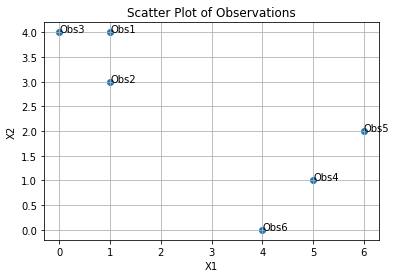

In [1]:
import matplotlib.pyplot as plt

observations = {
    "Obs1": [1, 4],
    "Obs2": [1, 3],
    "Obs3": [0, 4],
    "Obs4": [5, 1],
    "Obs5": [6, 2],
    "Obs6": [4, 0]
}

x1 = [obs[0] for obs in observations.values()]
x2 = [obs[1] for obs in observations.values()]

plt.scatter(x1, x2)

for i, obs in enumerate(observations.keys()):
    plt.annotate(obs, (x1[i], x2[i]))

plt.title('Scatter Plot of Observations')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()


## (b)  Randomly assign a cluster label to each observation. You can use the np.random.choice() function to do this. Report the cluster labels for each observation.

In [15]:
import numpy as np

n_observations = 6
cluster_labels = np.random.choice([0, 1], size=n_observations) #randomly selects a cluster (0 or 1) for each observation.
for i, label in enumerate(cluster_labels, 1):
    print(f"Observation {i}: Cluster {label}")

Observation 1: Cluster 0
Observation 2: Cluster 0
Observation 3: Cluster 1
Observation 4: Cluster 0
Observation 5: Cluster 1
Observation 6: Cluster 0


## (c)  Compute the centroid for each cluster.

In [22]:
observations = np.array([
    [1, 4],  # Obs 1
    [1, 3],  # Obs 2
    [0, 4],  # Obs 3
    [5, 1],  # Obs 4
    [6, 2],  # Obs 5
    [4, 0]   # Obs 6
])

cluster_0 = observations[cluster_labels == 0]
cluster_1 = observations[cluster_labels == 1]
centroid_0 = np.mean(cluster_0, axis=0) if len(cluster_0) > 0 else None
centroid_1 = np.mean(cluster_1, axis=0) if len(cluster_1) > 0 else None

print(f"Centroid of Cluster 0: {centroid_0}")
print(f"Centroid of Cluster 1: {centroid_1}")


Centroid of Cluster 0: [2.5 2. ]
Centroid of Cluster 1: [3.5 3. ]


## (d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

In [29]:
new_cluster_labels = []
for obs in observations:
    distance_to_centroid_0 = np.linalg.norm(obs - centroid_0) if centroid_0 is not None else np.inf
    distance_to_centroid_1 = np.linalg.norm(obs - centroid_1) if centroid_1 is not None else np.inf
    
    if distance_to_centroid_0 < distance_to_centroid_1:
        new_cluster_labels.append(0)
    else:
        new_cluster_labels.append(1)

for i, label in enumerate(new_cluster_labels, 1):
    print(f"Observation {i}: Cluster {label}")

Observation 1: Cluster 0
Observation 2: Cluster 0
Observation 3: Cluster 0
Observation 4: Cluster 1
Observation 5: Cluster 1
Observation 6: Cluster 0


##  (e) Repeat (c) and (d) until the answers obtained stop changing

In [30]:
def compute_centroids(observations, cluster_labels):
    centroid_0 = np.mean(observations[cluster_labels == 0], axis=0) if np.any(cluster_labels == 0) else None
    centroid_1 = np.mean(observations[cluster_labels == 1], axis=0) if np.any(cluster_labels == 1) else None
    return centroid_0, centroid_1

def assign_clusters(observations, centroids):
    new_cluster_labels = []
    for obs in observations:
        distance_to_centroid_0 = np.linalg.norm(obs - centroids[0]) if centroids[0] is not None else np.inf
        distance_to_centroid_1 = np.linalg.norm(obs - centroids[1]) if centroids[1] is not None else np.inf
        new_cluster_labels.append(0 if distance_to_centroid_0 < distance_to_centroid_1 else 1)
    return new_cluster_labels

# K-means algorithm
while True:
    centroids = compute_centroids(observations, cluster_labels)

    new_cluster_labels = assign_clusters(observations, centroids)

    if np.array_equal(new_cluster_labels, cluster_labels):
        break

    cluster_labels = new_cluster_labels

print("Final Cluster labels for each observation:")
for i, label in enumerate(cluster_labels, 1):
    print(f"Observation {i}: Cluster {label}")

print(f"\nFinal Centroid of Cluster 0:  {centroid_0}")
print(f"Final Centroid of Cluster 1:  {centroid_0}")

Final Cluster labels for each observation:
Observation 1: Cluster 1
Observation 2: Cluster 1
Observation 3: Cluster 1
Observation 4: Cluster 1
Observation 5: Cluster 1
Observation 6: Cluster 1

Final Centroid of Cluster 0:  [2.5 2. ]
Final Centroid of Cluster 1:  [2.5 2. ]


## (f)  In your plot from (a), color the observations according to the cluster labels obtained

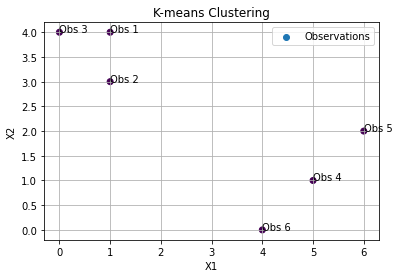

In [32]:
plt.scatter(observations[:, 0], observations[:, 1], c=cluster_labels, cmap='viridis', label='Observations')

if centroids[0] is not None:
    plt.scatter(centroids[0][0], centroids[0][1], marker='X', color='red', s=100, label='Centroid of Cluster 0')
if centroids[1] is not None:
    plt.scatter(centroids[1][0], centroids[1][1], marker='X', color='blue', s=100, label='Centroid of Cluster 1')

for i, obs in enumerate(range(1, 7)):
    plt.annotate(f"Obs {obs}", (observations[i, 0], observations[i, 1]))

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()